In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics



In [19]:
data=sm.datasets.fair.load_pandas().data

In [20]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [21]:
data['affair'] = (data['affairs'] >0).astype(int)

In [22]:
data.head(3)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1


### Data Exploration

In [24]:
data.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

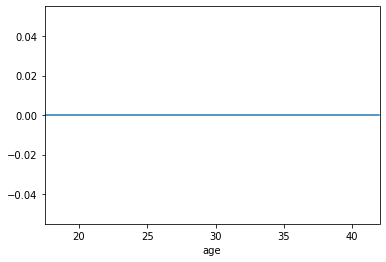

In [29]:
data.groupby('age')['affair'].median().plot()

In [34]:
data.groupbydf.('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


We can see from above that on average women who have affairs, rate there marriage lower which is expected

In [36]:
data.groupby('yrs_married').mean()

,rate_marriage,age,children,religious,educ,occupation,occupation_husb,affairs,affair
yrs_married,,,,,,,,,
0.5,4.524324,22.156757,0.048649,2.454054,14.237838,3.302703,3.502703,0.546486,0.043243
2.5,4.239921,23.640364,0.297198,2.312684,14.384956,3.383481,3.614061,0.984877,0.215831
6.0,4.066608,26.439089,1.036810,2.347064,14.454864,3.469763,3.881683,0.741184,0.339176
9.0,3.985050,28.985050,1.649502,2.368771,14.367110,3.393688,4.061462,0.737495,0.421927
13.0,4.038983,32.610169,1.916102,2.457627,14.218644,3.474576,4.100000,0.508149,0.411864
16.5,3.952323,35.135697,2.814181,2.601467,13.710269,3.415648,4.014670,0.484304,0.451100
23.0,3.956843,41.013564,3.281751,2.652281,13.794081,3.511714,4.051788,0.369099,0.425401


 As the years of marriage increases there is a slight decrease in the rating of marriage

In [37]:
data.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


It can be observed that with the increase in age, years of marriage and children,the marriage rating tends to decrease.

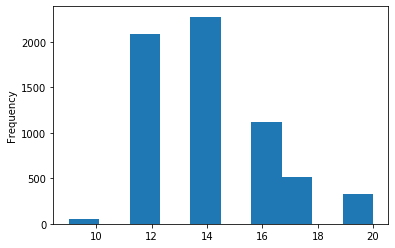

In [38]:
data['educ'].plot.hist()

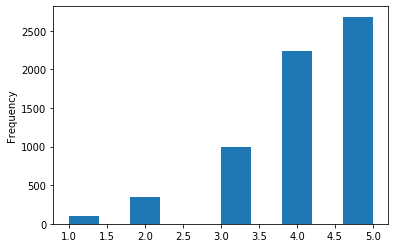

In [40]:
data['rate_marriage'].plot.hist()

As seen from the graph that there are significant number of people who are happy and have given there marriage rating as 4 and 5

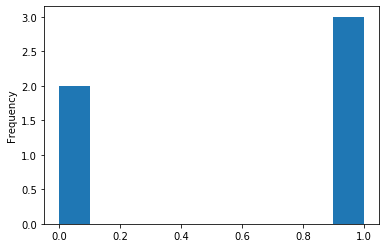

In [49]:
data.groupby('rate_marriage')['affair'].median().plot.hist()

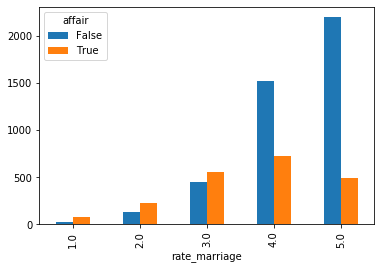

In [61]:
#Compute a simple cross-tabulation of two (or more) factors. By default computes a frequency table of the factors
#unless an array of values and an aggregation function are passed

pd.crosstab(data['rate_marriage'],data['affair'].astype(bool)).plot.bar()

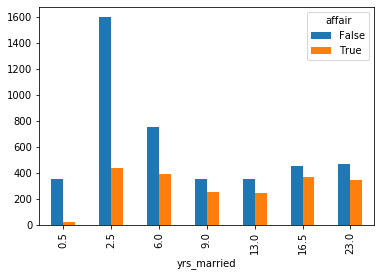

In [62]:
pd.crosstab(data['yrs_married'],data['affair'].astype(bool)).plot.bar()

In [71]:
y, x = dmatrices('affair ~ rate_marriage + age + yrs_married + children +  religious + educ +C(occupation) + C(occupation_husb)'
,data, return_type="dataframe")

In [72]:
x = x.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [73]:
y = np.ravel(y)


In [74]:
model=LogisticRegression()
model=model.fit(x,y)

C:\Users\surya\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [75]:
model.score(x,y)

0.7262016965127238

In [76]:
y.mean()

0.3224945020420987

In [77]:
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.3,random_state=42)

In [79]:
model2=LogisticRegression()
model2=model2.fit(x_train,y_train)

C:\Users\surya\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [82]:
predicted=model2.predict(x_test)
predicted

array([1., 0., 0., ..., 0., 0., 1.])

In [85]:
probs=model2.predict_proba(x_test)
probs

array([[0.49927169, 0.50072831],
       [0.90666207, 0.09333793],
       [0.7221562 , 0.2778438 ],
       ...,
       [0.87199711, 0.12800289],
       [0.72469055, 0.27530945],
       [0.20073763, 0.79926237]])

In [88]:
metrics.accuracy_score(y_test,predicted)

0.7197037701974865

In [87]:
metrics.roc_auc_score(y_test,probs[:,-1])

0.7333658473626494

In [89]:
metrics.confusion_matrix(y_test,predicted)

array([[2703,  335],
       [ 914,  504]], dtype=int64)

In [90]:
metrics.classification_report(y_test,predicted)

'              precision    recall  f1-score   support\n\n         0.0       0.75      0.89      0.81      3038\n         1.0       0.60      0.36      0.45      1418\n\n    accuracy                           0.72      4456\n   macro avg       0.67      0.62      0.63      4456\nweighted avg       0.70      0.72      0.70      4456\n'

In [92]:
scores=cross_val_score(LogisticRegression(),x,y,scoring='accuracy',cv=10)
print(scores)
print(scores.mean())

C:\Users\surya\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\surya\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

[0.72370487 0.69544741 0.73469388 0.70643642 0.71585557 0.7299843
 0.72955975 0.70754717 0.75       0.75314465]
0.7246374021306636


C:\Users\surya\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\surya\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Looks good it is still performing 73%, so our model is ready for prediction